In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
k_min = 8
k_max = 11

Upper bound without parameters

In [3]:
def upper_bound(k_min, k_max):
    output = 0
    for k in range(k_min, k_max):
        output += 15**k
    return output

output = upper_bound(k_min, k_max)
print(f"{output:e}")
print(f"{output/1e6} million")
print(output)

6.176566e+11
617656.640625 million
617656640625


In [4]:
output = upper_bound(6, 7)
print(f"{output:e}")
print(f"{output/1e6} million")
print(output)

1.139062e+07
11.390625 million
11390625


Lower upper bound with parameters for degen and alphabet

$
\sum_{k=k_{min}}^{k_{max}} \sum_{e=0}^{e^{max}} \binom{k}{e} 4^{k-e} d^{e}
$

In [5]:
e_max = k_max
d = 11

In [6]:
def degen_bound(k_min, k_max, e_max, d):
    output = 0
    for k in range(k_min, k_max+1):
        for e in range(e_max+1):
            motifs = math.comb(k, e) * 4**(k-e) * (d)**e
            output += motifs
    return output

output = degen_bound(k_min, k_max, e_max, d)
print(f"{output:e}")
print(f"{output/1e6} million")
print(output)

9.267412e+12
9267412.5 million
9267412500000.0


In [7]:
e_max = 3
d = 7

In [8]:
degen_bound(8, 11, 3, 11) / 1e6

19899.686912

In [9]:
output = degen_bound(k_min, k_max, e_max, d)
print()
print(f"{output:e}")
print(f"{output/1e6} million")
print(output)


5.516272e+09
5516.271616 million
5516271616


In [10]:
output = degen_bound(8, 9, 2, 7)
print()
print(f"{output:e}")
print(f"{output/1e6} million")
print(output)


3.989504e+07
39.89504 million
39895040


In [11]:
degen_bound(8, 9, 3, 11)

627777536

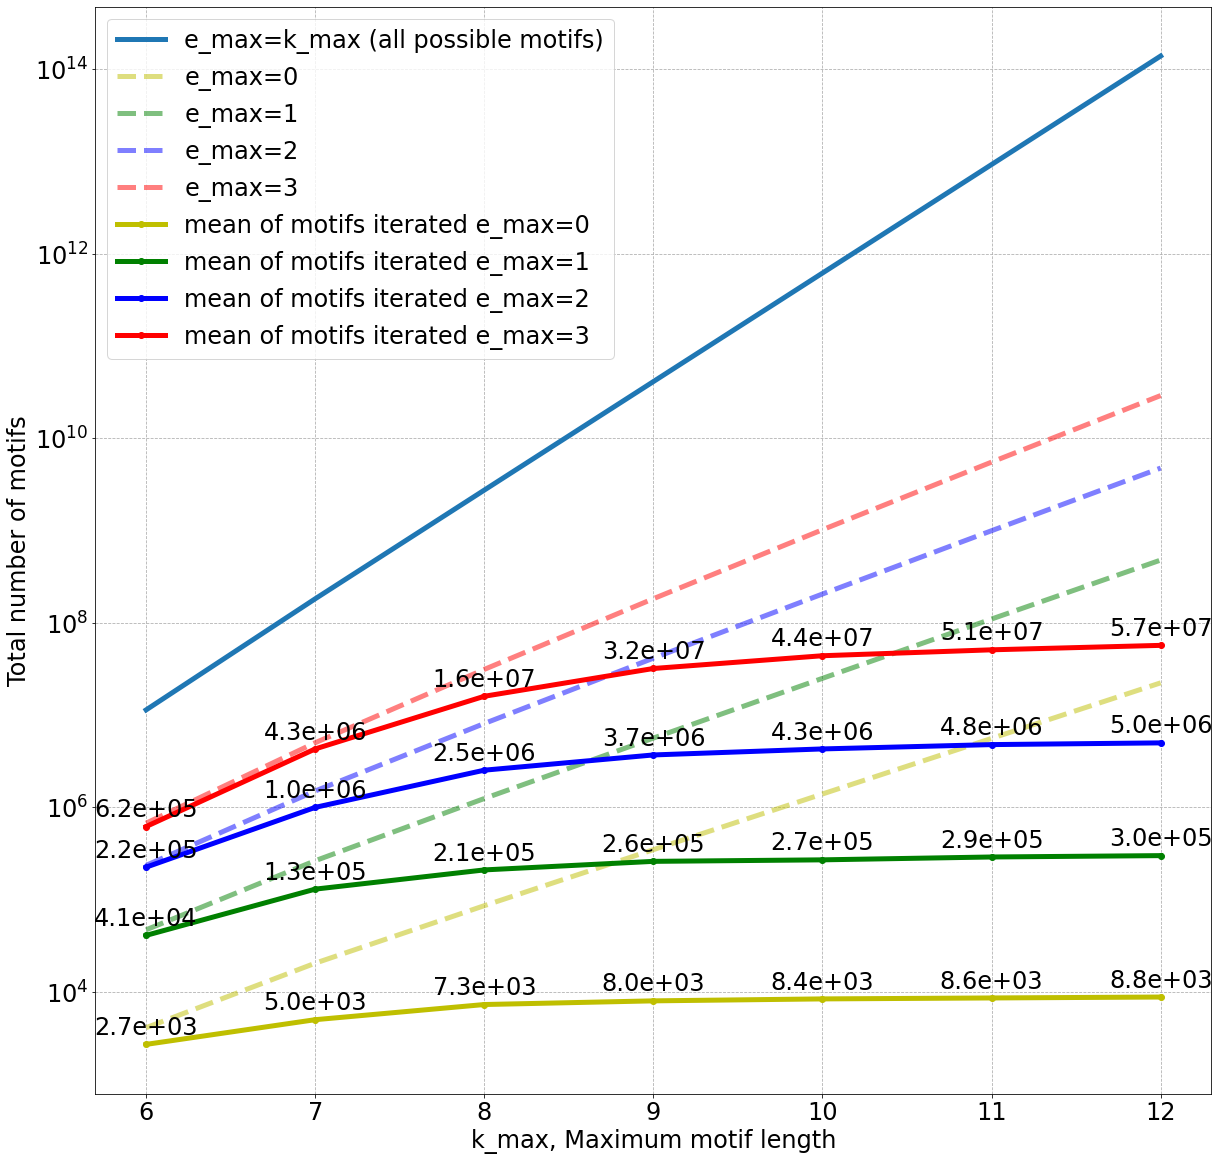

In [18]:
plt.rcParams.update({'font.size': 24})
k_min = 6
k_max = 12
xs = list(range(k_min, k_max+1))
ys = [upper_bound(k_min, x+1) for x in xs]
fig, ax = plt.subplots(figsize=(20,20), )

colors = "ygbr"
width = 5
plt.plot(xs, ys, '-', label='e_max=k_max (all possible motifs)', linewidth=width)

for color, e in zip(colors, range(e_max+1)):
    ys = [degen_bound(k_min, x, e, d) for x in xs]
#     plt.plot(xs, ys, '-', label=f"e_max={e}")
    plt.plot(xs, ys, f'{color}--', label=f"e_max={e}", alpha=.5, linewidth=width)

i = 0
yss = [
    # 0
    [2.7e3, 5e3, 7.3e3, 8e3, 8.4e3, 8.6e3, 8.8e3][i:],
    # 1
    [4.1e4, 1.3e5, 2.1e5, 2.6e5, 2.7e5, 2.9e5, 3e5][i:],
    # 2
    [2.25e5, 1e6, 2.53e6, 3.7e6, 4.3e6, 4.79e6, 5e6][i:],
    # 3
    [6.2e5, 4.3e6, 1.6e7, 3.2e7, 4.4e7, 5.1e7, 5.7e7][i:],
]
    
for i in range(4):
    plt.plot(xs, yss[i], f'{colors[i]}-o', label=f'mean of motifs iterated e_max={i}', linewidth=width)
    for x, y in zip(xs, yss[i]):
        label = f"{y:1.1e}"
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')
plt.yscale('log')

# ticks = np.logspace(0, 14, 15)[::2]
# ax.set_yticks(ticks)
plt.grid(True,which="both", linestyle='--')
plt.xlabel('k_max, Maximum motif length')
plt.ylabel('Total number of motifs')
# plt.title("Complexity in motifs")
plt.legend()
plt.savefig("output.svg")

## Nodes in tree map

In [20]:
alphabet = 16
# exclusive
max_motif = 9

nodes = (alphabet**(max_motif-1))/(alphabet-1)
print(f"{nodes:e}")

2.863312e+08


## Unique motifs from BLSSpeller data

In [21]:
6.97e7 - 1.59e7

53800000.0